# Self-Driving Car Engineer Nanodegree

## Project 3 : Build a Traffic Sign Recognition Classifier


### Objective:

1. To train the provided Traffic Signal images with 43 classes using Convolutional Neural Network (LeNet).
2. Add New images apart from the images provided in dataset and check the predictions.

## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle
import numpy as np

#Fill this in based on where you saved the training and testing data

training_file = "../data/train.p"
validation_file= "../data/valid.p"
testing_file = "../data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_valid shape:", X_valid.shape)
print("y_valid shape:", y_valid.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (34799, 32, 32, 3)
y_train shape: (34799,)
X_valid shape: (4410, 32, 32, 3)
y_valid shape: (4410,)
X_test shape: (12630, 32, 32, 3)
y_test shape: (12630,)


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**


### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = np.shape(X_train)[0]

# TODO: Number of validation examples
n_validation = np.shape(X_valid)[0]

# TODO: Number of testing examples.
n_test = np.shape(X_test)[0]

# TODO: What's the shape of an traffic sign image?
image_shape = np.shape(X_train)[1:4]

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of Validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of Validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

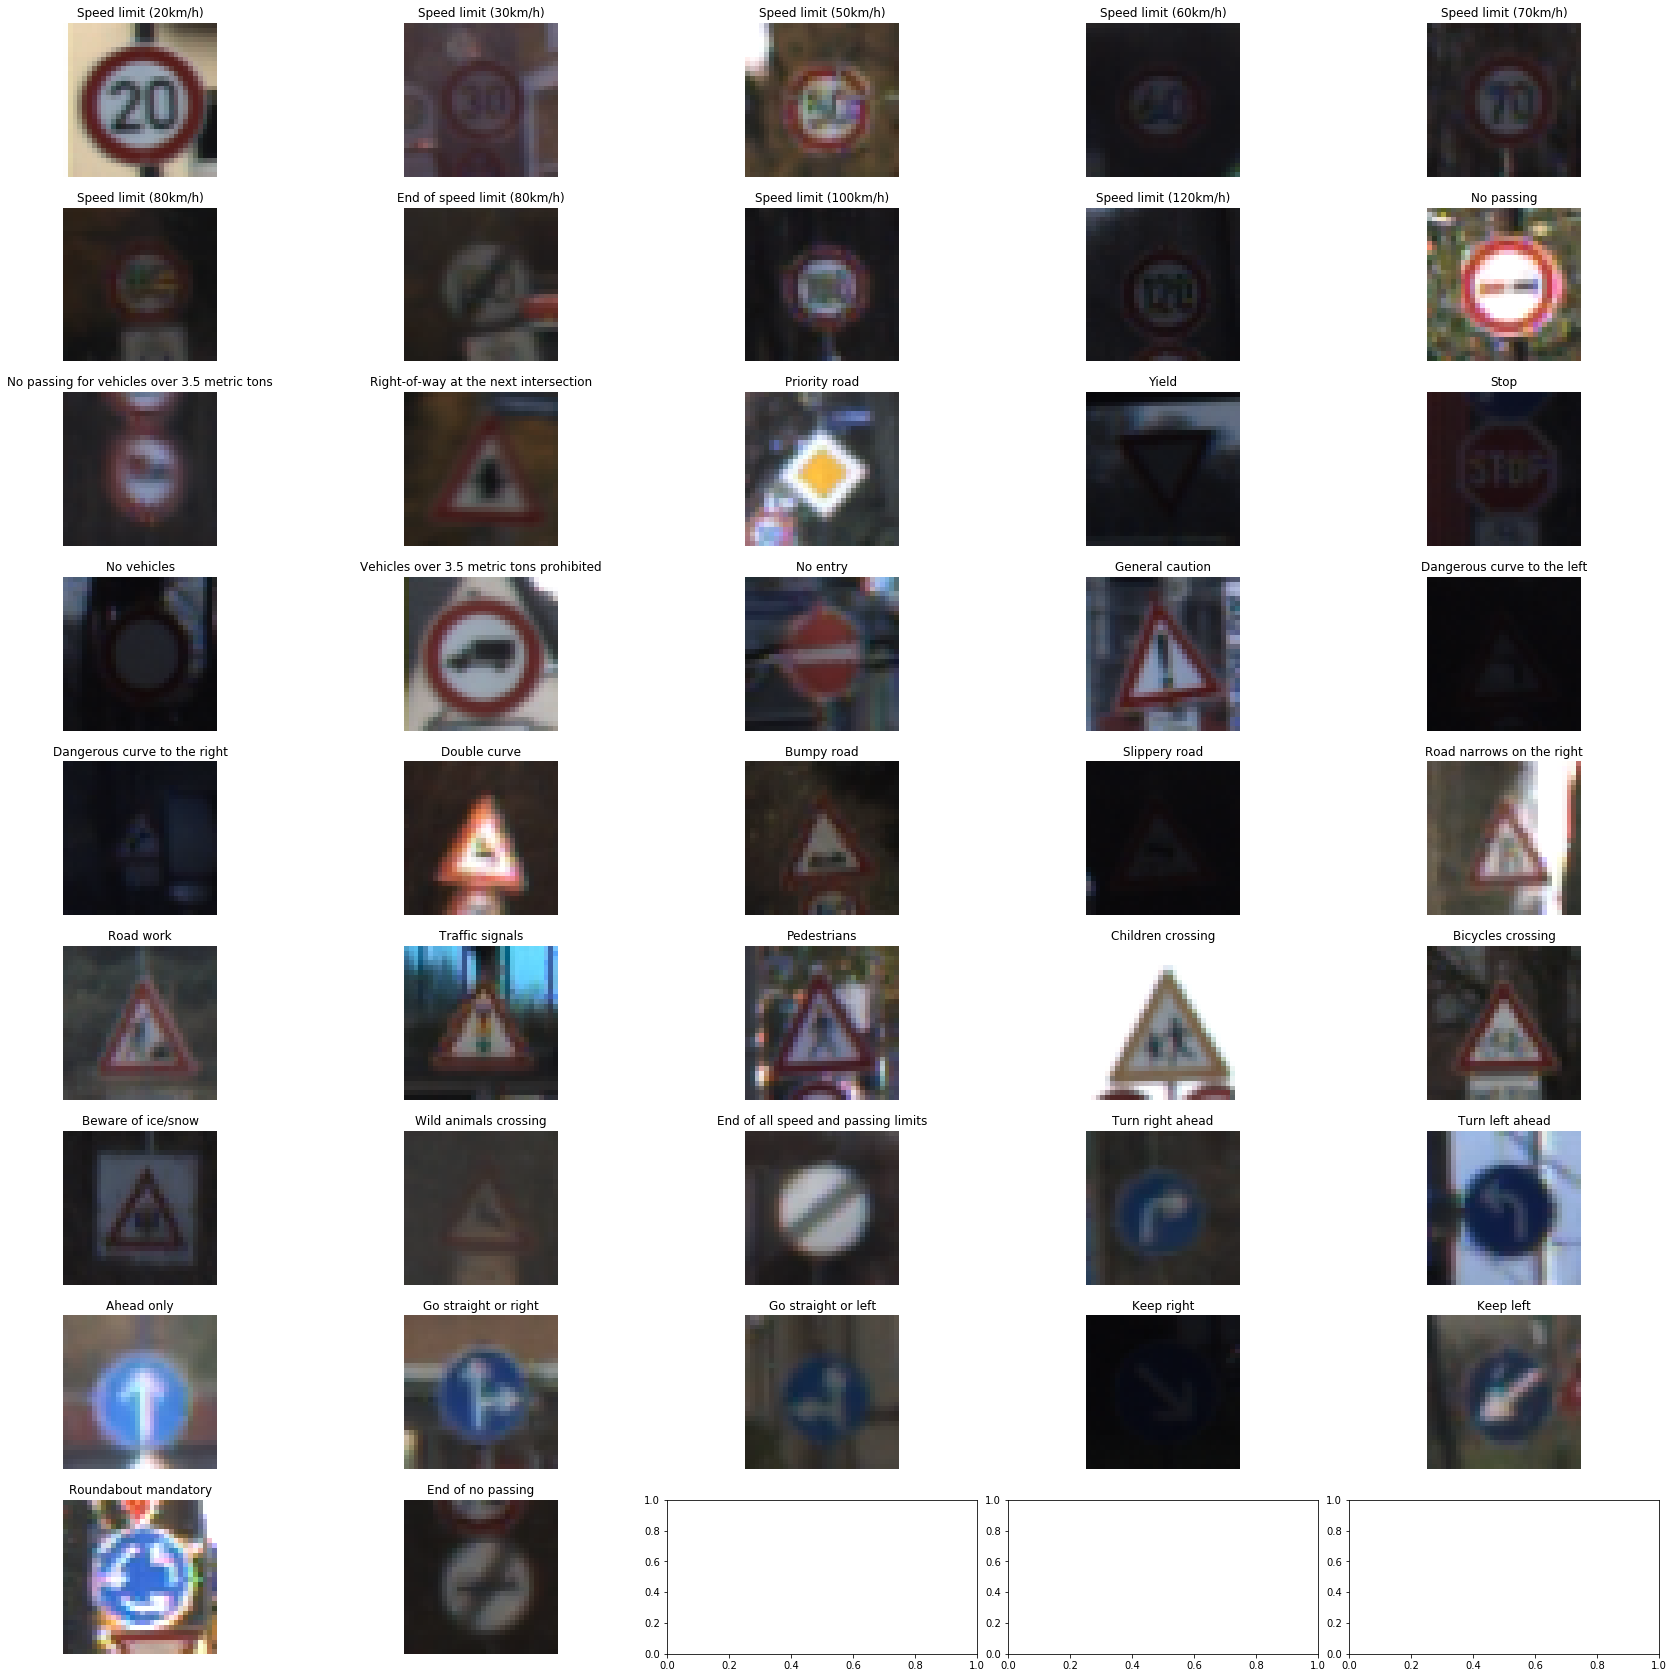

In [3]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import csv
# Visualizations will be shown in the notebook.
%matplotlib inline

SignalVal = []

Csvfile = open('signnames.csv')
reader = csv.reader(Csvfile)

for row in reader:
    SignalVal.append(row)


        
labels, indices = np.unique(y_train, return_index=True)

fig, axs = plt.subplots(9,5, figsize=(30, 30))
fig.subplots_adjust(hspace = 0.2, wspace=0.1)
axs = axs.ravel()

for index in range(n_classes-1):
    image = X_train[indices[index]]
    axs[index].axis('off')
    axs[index].imshow(image)
    axs[index].set_title((SignalVal[index+1][1]))
        


Histogram of Training DataSet

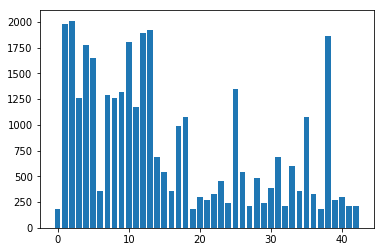

In [4]:
#Histogram

hist, bin_edges  = np.histogram(y_train, bins=n_classes)
plt.bar(range(0,n_classes),hist)
plt.show()

Histogram of Validation Data Set

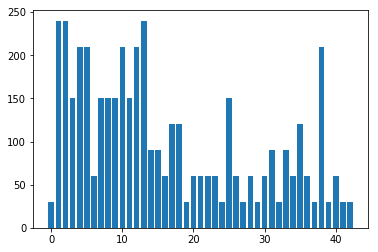

In [5]:
hist, bin_edges  = np.histogram(y_valid, bins=n_classes)
plt.bar(range(0,n_classes),hist)
plt.show()

Histogram of Test Data Set

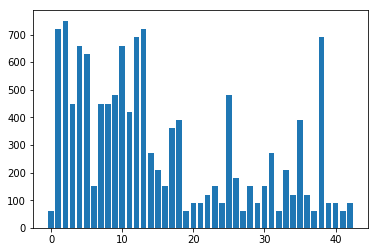

In [6]:
hist, bin_edges  = np.histogram(y_test, bins=n_classes)
plt.bar(range(0,n_classes),hist)
plt.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation was used to train the images in Convolutional Neural Network.


### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Train
Color Image Shape :  (34799, 32, 32, 3)
Grayscale Shape :  (34799, 32, 32, 1)
 
Validate
Color Image Shape :  (4410, 32, 32, 3)
Grayscale Shape :  (4410, 32, 32, 1)

Test
Color Image Shape :  (12630, 32, 32, 3)
Grayscale Shape :  (12630, 32, 32, 1)


Text(0.5,1,'Gray Image')

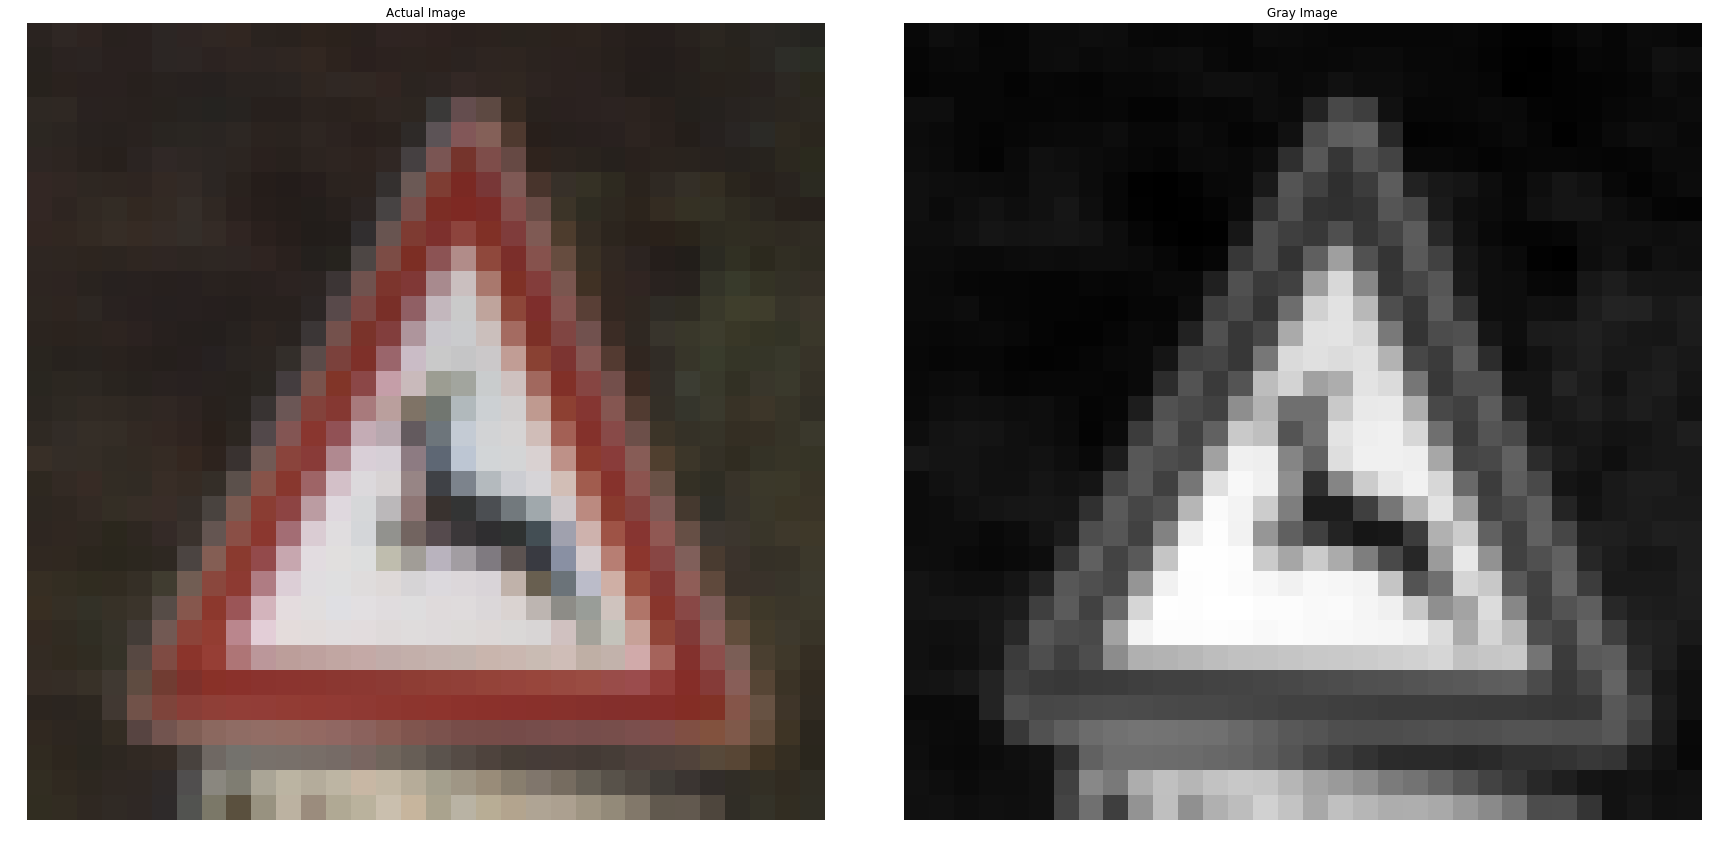

In [7]:
X_train_Gray = np.sum(X_train/3, axis=3, keepdims=True)
X_valid_Gray = np.sum(X_valid/3, axis=3, keepdims=True)
X_test_Gray  = np.sum(X_test/3,  axis=3, keepdims=True)

print("Train")
print("Color Image Shape : " , X_train.shape)
print("Grayscale Shape : " , X_train_Gray.shape)
print(" ")
print("Validate")
print("Color Image Shape : " , X_valid.shape)
print("Grayscale Shape : " , X_valid_Gray.shape)
print("")
print("Test")
print("Color Image Shape : " , X_test.shape)
print("Grayscale Shape : " , X_test_Gray.shape)

fig, axs = plt.subplots(1,2, figsize=(30, 30))
fig.subplots_adjust(hspace = 0.2, wspace=0.1)
axs = axs.ravel()

axs[0].axis('off')
axs[0].imshow(X_train[500].squeeze())
axs[0].set_title('Actual Image')

axs[1].axis('off')
axs[1].imshow(X_train_Gray[500].squeeze(),plt.gray())
axs[1].set_title('Gray Image')

Text(0.5,1,'Norm Image')

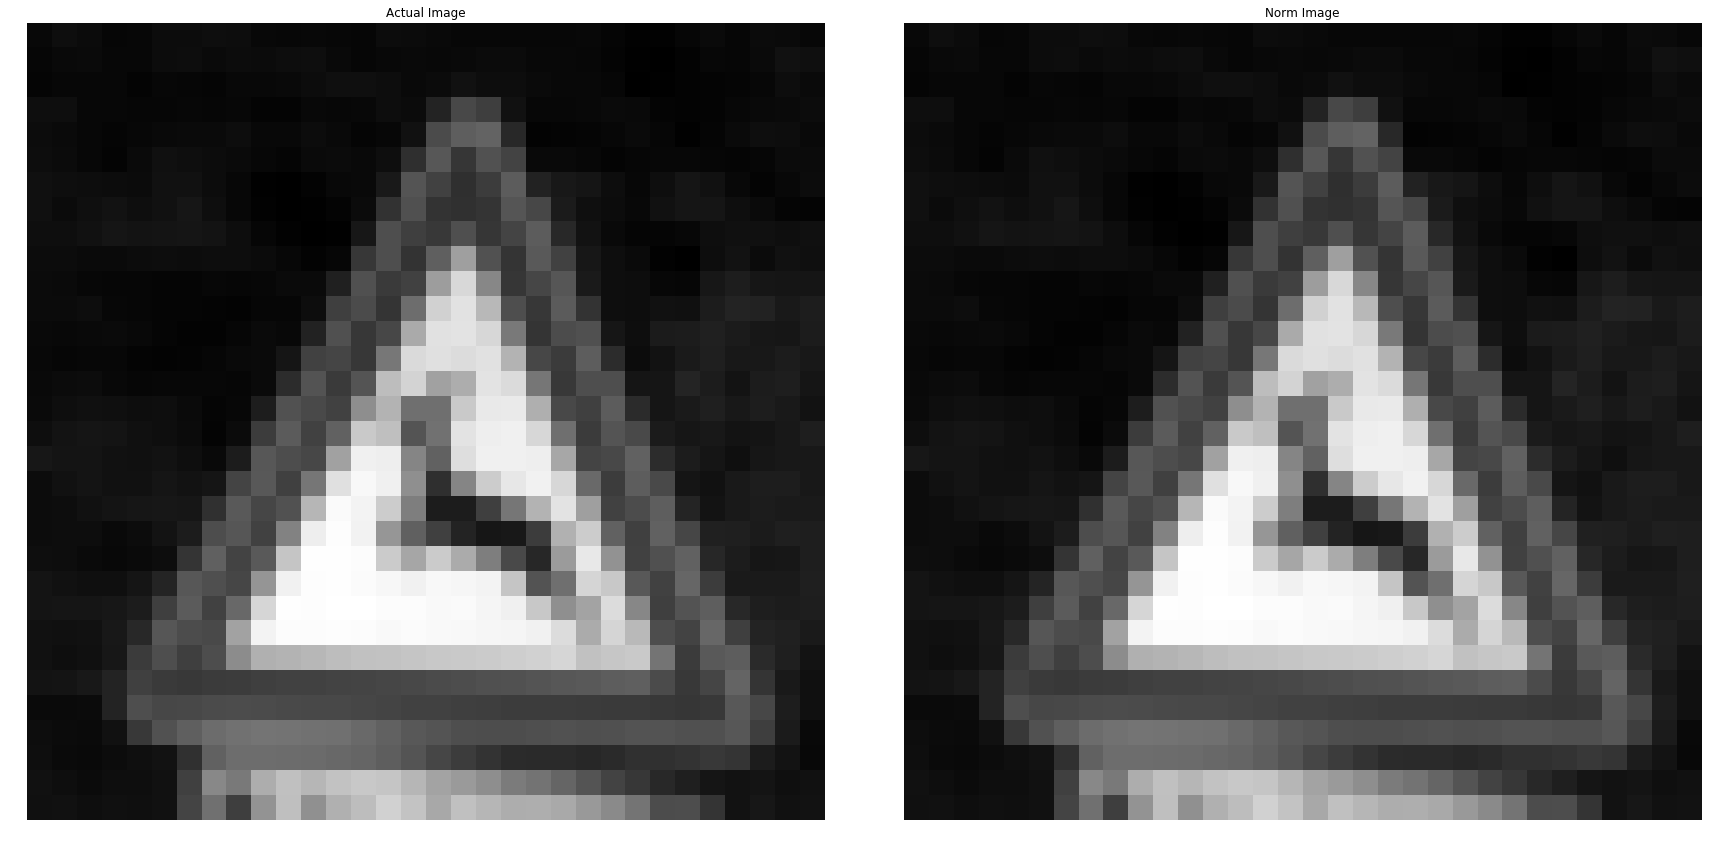

In [8]:
X_train_Norm = (X_train_Gray - 128)/128 
X_valid_Norm = (X_valid_Gray - 128)/128
X_test_Norm = (X_test_Gray - 128)/128

fig, axs = plt.subplots(1,2, figsize=(30, 30))
fig.subplots_adjust(hspace = 0.2, wspace=0.1)
axs = axs.ravel()

axs[0].axis('off')
axs[0].imshow(X_train_Gray[500].squeeze())
axs[0].set_title('Actual Image')

axs[1].axis('off')
axs[1].imshow(X_train_Norm[500].squeeze(),plt.gray())
axs[1].set_title('Norm Image')

### Model Architecture

In [9]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

from sklearn.utils import shuffle


### Train, Validate and Test the Model

In [10]:
import tensorflow as tf

EPOCHS = 200
BATCH_SIZE = 80

In [11]:
from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)
    fc1    = tf.nn.dropout(fc1, 1.0) 

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)
    fc2    = tf.nn.dropout(fc2, 1.0) 

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 10.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, n_classes), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(n_classes))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

In [12]:
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y , n_classes)

In [13]:
rate = 0.001

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [14]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

Training...

EPOCH 1 ...
Training Accuracy = 0.866
Validation Accuracy = 0.789
EPOCH 2 ...
Training Accuracy = 0.930
Validation Accuracy = 0.859
EPOCH 3 ...
Training Accuracy = 0.965
Validation Accuracy = 0.899
EPOCH 4 ...
Training Accuracy = 0.971
Validation Accuracy = 0.898
EPOCH 5 ...
Training Accuracy = 0.982
Validation Accuracy = 0.910
EPOCH 6 ...
Training Accuracy = 0.986
Validation Accuracy = 0.900
EPOCH 7 ...
Training Accuracy = 0.988
Validation Accuracy = 0.907
EPOCH 8 ...
Training Accuracy = 0.994
Validation Accuracy = 0.928
EPOCH 9 ...
Training Accuracy = 0.990
Validation Accuracy = 0.942
EPOCH 10 ...
Training Accuracy = 0.988
Validation Accuracy = 0.914
EPOCH 11 ...
Training Accuracy = 0.993
Validation Accuracy = 0.923
EPOCH 12 ...
Training Accuracy = 0.995
Validation Accuracy = 0.918
EPOCH 13 ...
Training Accuracy = 0.992
Validation Accuracy = 0.920
EPOCH 14 ...
Training Accuracy = 0.995
Validation Accuracy = 0.914
EPOCH 15 ...
Training Accuracy = 0.986
Validation Accuracy

EPOCH 123 ...
Training Accuracy = 1.000
Validation Accuracy = 0.950
EPOCH 124 ...
Training Accuracy = 1.000
Validation Accuracy = 0.950
EPOCH 125 ...
Training Accuracy = 1.000
Validation Accuracy = 0.949
EPOCH 126 ...
Training Accuracy = 1.000
Validation Accuracy = 0.949
EPOCH 127 ...
Training Accuracy = 1.000
Validation Accuracy = 0.950
EPOCH 128 ...
Training Accuracy = 1.000
Validation Accuracy = 0.949
EPOCH 129 ...
Training Accuracy = 1.000
Validation Accuracy = 0.950
EPOCH 130 ...
Training Accuracy = 1.000
Validation Accuracy = 0.950
EPOCH 131 ...
Training Accuracy = 1.000
Validation Accuracy = 0.949
EPOCH 132 ...
Training Accuracy = 1.000
Validation Accuracy = 0.949
EPOCH 133 ...
Training Accuracy = 1.000
Validation Accuracy = 0.950
EPOCH 134 ...
Training Accuracy = 1.000
Validation Accuracy = 0.949
EPOCH 135 ...
Training Accuracy = 1.000
Validation Accuracy = 0.949
EPOCH 136 ...
Training Accuracy = 1.000
Validation Accuracy = 0.949
EPOCH 137 ...
Training Accuracy = 1.000
Validati

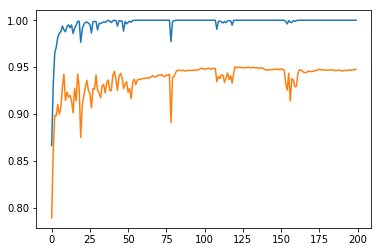

In [15]:
validation_accuracies = []
training_accuracies = []
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train_Norm)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train_Norm, y_train = shuffle(X_train_Norm, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train_Norm[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
        
        training_accuracy = evaluate(X_train_Norm, y_train)    
        validation_accuracy = evaluate(X_valid_Norm, y_valid)
        
        validation_accuracies.append(validation_accuracy)
        training_accuracies.append(training_accuracy)
        
        print("EPOCH {} ...".format(i+1))
        print("Training Accuracy = {:.3f}".format(training_accuracy))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))

        
    saver.save(sess, './lenet')
    
    # show learning statistics
    plt.plot(range(EPOCHS),training_accuracies)
    plt.show
    
    plt.plot(range(EPOCHS),validation_accuracies)
    plt.show
    
    print("Model saved")

In [16]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test_Norm, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from ./lenet
Test Accuracy = 0.940


---

## Step 3: Test a Model on New Images

We find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

NewImages/35_StraightAhead.jpg
NewImages/32_Endofallspeed.jpg
NewImages/26_TrafficSignals.jpg
NewImages/12_Priority.jpg
NewImages/17_NoEntry.jpg
[35, 32, 26, 12, 17]


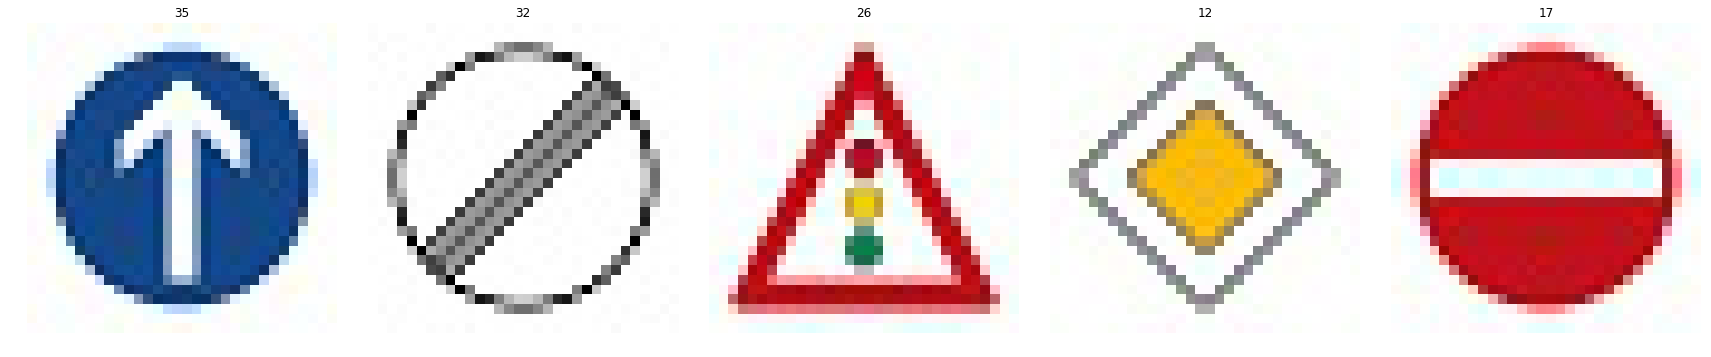

In [17]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import glob
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg
import cv2

Newlabel = []
X_NewImage = []
X_NewImage_Gray = []
for image_file in glob.glob('NewImages/' + "*.jpg"):
    print(image_file)
    temp = np.array(mpimg.imread(image_file))
    X_NewImage.append(np.array(temp))
    Newlabel.append(int(image_file[10:12]))
print(Newlabel)
fig, axs = plt.subplots(1,5, figsize=(30, 30))
fig.subplots_adjust(hspace = 0.2, wspace=0.1)
axs = axs.ravel()

for index in range(0,len(Newlabel)):
    image = X_NewImage[index]
    axs[index].axis('off')
    axs[index].imshow(image)
    axs[index].set_title((Newlabel[index])) 
    
X_NewImage = np.asarray(X_NewImage)

X_NewImage_Gray = np.sum(X_NewImage/3, axis=3, keepdims=True)

X_NewImage_Norm = (X_NewImage_Gray - 128)/128 


### Predict the Sign Type for Each Image

In [18]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.


prediction=tf.argmax(logits,1)

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    predictions = sess.run(prediction, feed_dict={x: X_NewImage_Norm})
    
    print (predictions)

INFO:tensorflow:Restoring parameters from ./lenet
[35 32 26 12 17]


### Analyze Performance

In [19]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    
    test_accuracy = evaluate(X_NewImage_Norm, Newlabel)
    print("Test Accuracy = {:.3f}".format(test_accuracy))


INFO:tensorflow:Restoring parameters from ./lenet
Test Accuracy = 1.000


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

INFO:tensorflow:Restoring parameters from ./lenet


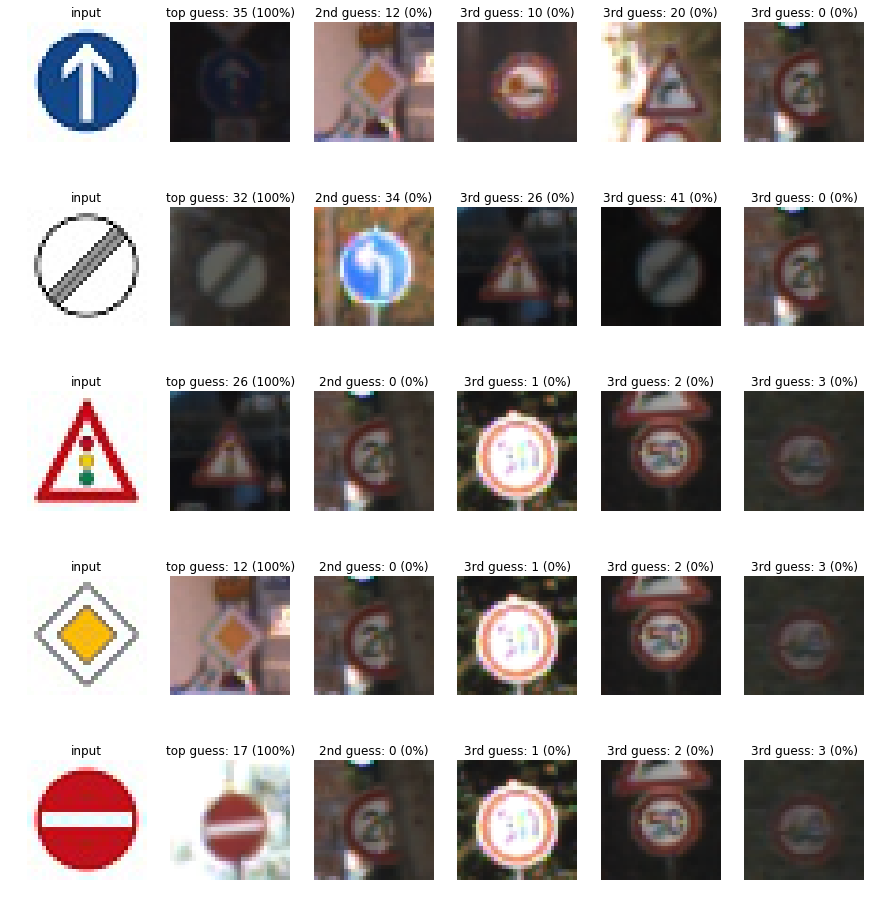

In [20]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

softmax = tf.nn.softmax(logits)
top_k = tf.nn.top_k(softmax, k=5)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver.restore(sess, "./lenet")
    softmax_logits = sess.run(softmax, feed_dict={x: X_NewImage_Norm})
    top_k = sess.run(top_k, feed_dict={x: X_NewImage_Norm})
    
    fig, axs = plt.subplots(len(X_NewImage),6, figsize=(15, 16))
    fig.subplots_adjust(hspace = .4, wspace=.2)
    axs = axs.ravel()

    for i, image in enumerate(X_NewImage):
        axs[6*i].axis('off')
        axs[6*i].imshow(image)
        axs[6*i].set_title('input')
        
        guess1 = top_k[1][i][0]
        index1 = np.argwhere(y_valid == guess1)[0]
        axs[6*i+1].axis('off')
        axs[6*i+1].imshow(X_valid[index1].squeeze(), cmap='gray')
        axs[6*i+1].set_title('top guess: {} ({:.0f}%)'.format(guess1, 100*top_k[0][i][0]))
        
        guess2 = top_k[1][i][1]
        index2 = np.argwhere(y_valid == guess2)[0]
        axs[6*i+2].axis('off')
        axs[6*i+2].imshow(X_valid[index2].squeeze(), cmap='gray')
        axs[6*i+2].set_title('2nd guess: {} ({:.0f}%)'.format(guess2, 100*top_k[0][i][1]))
        
        guess3 = top_k[1][i][2]
        index3 = np.argwhere(y_valid == guess3)[0]
        axs[6*i+3].axis('off')
        axs[6*i+3].imshow(X_valid[index3].squeeze(), cmap='gray')
        axs[6*i+3].set_title('3rd guess: {} ({:.0f}%)'.format(guess3, 100*top_k[0][i][2]))
        
        guess4 = top_k[1][i][3]
        index4 = np.argwhere(y_valid == guess4)[0]
        axs[6*i+4].axis('off')
        axs[6*i+4].imshow(X_valid[index4].squeeze(), cmap='gray')
        axs[6*i+4].set_title('3rd guess: {} ({:.0f}%)'.format(guess4, 100*top_k[0][i][3]))
        
        guess5 = top_k[1][i][4]
        index5 = np.argwhere(y_valid == guess5)[0]
        axs[6*i+5].axis('off')
        axs[6*i+5].imshow(X_valid[index5].squeeze(), cmap='gray')
        axs[6*i+5].set_title('3rd guess: {} ({:.0f}%)'.format(guess5, 100*top_k[0][i][4]))